<a href="https://colab.research.google.com/github/exterm/uvm-pocs/blob/main/visualize_PII_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd 
import ast
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
import collections 
from collections import Counter 
import re

#Sklearn
import sklearn as sk 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.probability import FreqDist
from nltk.probability import DictionaryProbDist


In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Making a bag of words

In [ ]:
texts = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/data/filtered_pii_extracted/2019_pii_extracted.csv')

In [ ]:
list_of_texts = texts['PII_Extracted'].tolist()


In [ ]:
#Setup scikit vectorizer
vectorizer = CountVectorizer(min_df=1)
term_doc_matrix = vectorizer.fit_transform(list_of_texts)
vectorizer.get_feature_names_out()

array(['abilities', 'address', 'age', 'aids', 'alias', 'analyze',
       'ancestry', 'aptitudes', 'attitudes', 'audio', 'beacons',
       'behavior', 'behavioral', 'biological', 'biometric', 'cancer',
       'care', 'characteristics', 'child', 'childbirth', 'citizenship',
       'color', 'combination', 'condition', 'cookies', 'coordinates',
       'diagnosis', 'disability', 'education', 'employment', 'ethnic',
       'exercise', 'face', 'faceprint', 'family', 'fingerprint',
       'fingerprints', 'gender', 'genetic', 'geolocation', 'hand',
       'health', 'height', 'household', 'identified', 'identifiers',
       'inferences', 'initials', 'intelligence', 'interests', 'iris',
       'language', 'latitude', 'locate', 'location', 'longitude',
       'medicine', 'mental', 'movements', 'name', 'nursing', 'olfactory',
       'optometry', 'origin', 'palm', 'password', 'passwords', 'patient',
       'pharmacy', 'physical', 'physiological', 'predict', 'preferences',
       'pregnancy', 'profes

In [ ]:
# Put BoW vectors into a new df
policy_texts_bow = pd.DataFrame(term_doc_matrix.toarray(), columns=vectorizer.get_feature_names_out())

saving bag of words 

In [ ]:
policy_texts_bow.to_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2019_bow_pii_terms.csv')

# Getting Info about the bag of words

In [ ]:
bow_1997 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/1997_bow_pii_terms.csv')
bow_1998 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/1998_bow_pii_terms.csv')
bow_1999 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/1999_bow_pii_terms.csv')
bow_2000 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2000_bow_pii_terms.csv')
bow_2001 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2001_bow_pii_terms.csv')
bow_2002 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2002_bow_pii_terms.csv')
bow_2003 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2003_bow_pii_terms.csv')
bow_2004 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2004_bow_pii_terms.csv')
bow_2005 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2005_bow_pii_terms.csv')
bow_2006 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2006_bow_pii_terms.csv')
bow_2007 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2007_bow_pii_terms.csv')
bow_2008 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2008_bow_pii_terms.csv')
bow_2009 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2009_bow_pii_terms.csv')
bow_2010 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2010_bow_pii_terms.csv')
bow_2011 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2011_bow_pii_terms.csv')
bow_2012 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2012_bow_pii_terms.csv')
bow_2013 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2013_bow_pii_terms.csv')
bow_2014 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2014_bow_pii_terms.csv')
bow_2015 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2015_bow_pii_terms.csv')
bow_2016 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2016_bow_pii_terms.csv')
bow_2017 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2017_bow_pii_terms.csv')
bow_2018 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2018_bow_pii_terms.csv')
bow_2019 = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/2019_bow_pii_terms.csv')
bow_All = pd.read_csv('/content/drive/MyDrive/RESEARCH/CODE AND DATA/Pirvacy_Policies_OT/PoCS/figures/general_bagofwords/allyears_bow_pii_terms.csv')

In [ ]:
#getting the counts of words in our bag of words for all words in the entire corpus 


In [ ]:
word_counts_bow_all = bow_All.sum(axis=0).sort_values(ascending=True)
word_counts_bow_1997 = bow_1997.sum(axis=0).sort_values(ascending=True)
word_counts_bow_1998 = bow_1998.sum(axis=0).sort_values(ascending=True)
word_counts_bow_1999 = bow_1999.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2000 = bow_2000.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2001 = bow_2001.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2002 = bow_2002.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2003 = bow_2003.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2004 = bow_2004.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2005 = bow_2005.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2006 = bow_2006.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2007 = bow_2007.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2008 = bow_2008.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2009 = bow_2009.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2010 = bow_2010.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2011 = bow_2011.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2012 = bow_2012.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2013 = bow_2013.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2014 = bow_2014.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2015 = bow_2015.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2016 = bow_2016.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2017 = bow_2017.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2018 = bow_2018.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2019 = bow_2019.sum(axis=0).sort_values(ascending=True)


In [ ]:
#returns the sum on word counts in the bag of words 
word_counts_bow_sum_all = word_counts_bow_all.sum()
word_counts_bow_sum_1997 = word_counts_bow_1997.sum()
word_counts_bow_sum_1998 = word_counts_bow_1998.sum()
word_counts_bow_sum_1999 = word_counts_bow_1999.sum()
word_counts_bow_sum_2000 = word_counts_bow_2000.sum()
word_counts_bow_sum_2001 = word_counts_bow_2001.sum()
word_counts_bow_sum_2002 = word_counts_bow_2002.sum()
word_counts_bow_sum_2003 = word_counts_bow_2003.sum()
word_counts_bow_sum_2004 = word_counts_bow_2004.sum()
word_counts_bow_sum_2005 = word_counts_bow_2005.sum()
word_counts_bow_sum_2006 = word_counts_bow_2006.sum()
word_counts_bow_sum_2007 = word_counts_bow_2007.sum()
word_counts_bow_sum_2008 = word_counts_bow_2008.sum()
word_counts_bow_sum_2009 = word_counts_bow_2009.sum()
word_counts_bow_sum_2010 = word_counts_bow_2010.sum()
word_counts_bow_sum_2011 = word_counts_bow_2011.sum()
word_counts_bow_sum_2012 = word_counts_bow_2012.sum()
word_counts_bow_sum_2013 = word_counts_bow_2013.sum()
word_counts_bow_sum_2014 = word_counts_bow_2014.sum()
word_counts_bow_sum_2015 = word_counts_bow_2015.sum()
word_counts_bow_sum_2016 = word_counts_bow_2016.sum()
word_counts_bow_sum_2017 = word_counts_bow_2017.sum()
word_counts_bow_sum_2018 = word_counts_bow_2018.sum()
word_counts_bow_sum_2019 = word_counts_bow_2019.sum()


In [ ]:
# # Returns the percent sum over a DataFrame or Series axis.
# percentsum_bow_all = word_counts_bow_all/word_counts_bow_sum_all
# percentsum_bow_all.plot()

In [ ]:
allWords = bow_All.keys()
allWords = allWords.drop('Unnamed: 0')

bow_list = [bow_1997,bow_1998,bow_1999,bow_2000,bow_2001,bow_2002,bow_2003,bow_2004,bow_2005,bow_2006,bow_2007,bow_2008,bow_2009,bow_2010,bow_2011,bow_2012,bow_2013,bow_2014,bow_2015,bow_2016,bow_2017,bow_2018,bow_2019]
allwords_per_year = np.zeros(len(bow_list))
counter = 0
for year in bow_list:
  for word in allWords:
    try:
      allwords_per_year[counter] += year[word].sum()
    except:
      continue
  counter += 1

print(allwords_per_year)

[2.60000e+01 6.96000e+02 3.47100e+03 2.06290e+04 3.29320e+04 4.78410e+04
 5.94640e+04 7.79740e+04 9.56850e+04 1.27744e+05 1.65739e+05 2.03465e+05
 2.43380e+05 3.16702e+05 4.41731e+05 5.01398e+05 5.75158e+05 6.46021e+05
 7.14554e+05 7.87545e+05 7.75627e+05 7.79859e+05 9.05154e+05]


In [ ]:
print(allWords)

Index(['abilities', 'address', 'age', 'aids', 'alias', 'analyze', 'ancestry',
       'aptitudes', 'attitudes', 'audio', 'beacons', 'behavior', 'behavioral',
       'biological', 'biometric', 'breastfeeding', 'cancer', 'characteristics',
       'child', 'childbirth', 'chiropractic', 'citizenship', 'color',
       'combination', 'condition', 'cookies', 'coordinates', 'dentistry',
       'diagnosis', 'disability', 'dna', 'education', 'employment', 'ethnic',
       'exercise', 'face', 'faceprint', 'family', 'fingerprint',
       'fingerprints', 'gender', 'genetic', 'geolocation', 'hand', 'health',
       'height', 'hiv', 'household', 'identified', 'identifiers', 'inferences',
       'initials', 'intelligence', 'interests', 'iris', 'irises', 'language',
       'latitude', 'locate', 'location', 'longitude', 'medicine', 'mental',
       'movements', 'name', 'nursing', 'olfactory', 'optometry', 'origin',
       'palm', 'password', 'passwords', 'patient', 'pharmacy', 'physical',
       'physiol

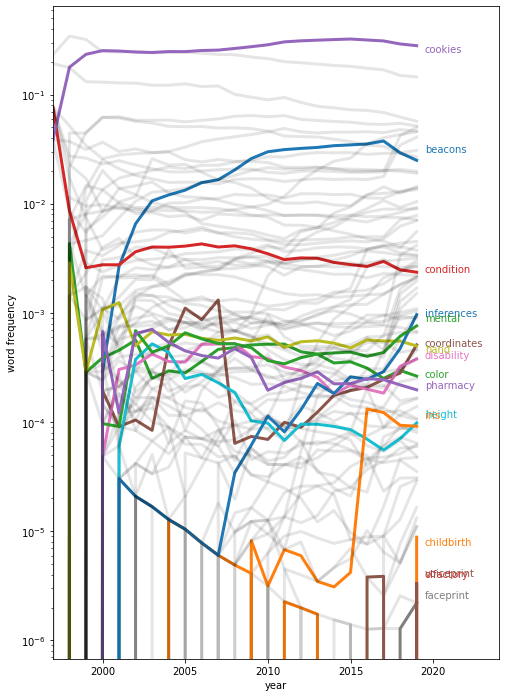

In [ ]:
from matplotlib.pyplot import figure
import random
figure(figsize=(8, 12))

wordsOfInterest = ['cookies']#, 'beacons','child','location','genetic','iris']

for word in allWords:
  freq_per_year = np.zeros(len(bow_list))
  counter = -1
  flag = False
  for year in bow_list:
    counter += 1
    try:
      freq_per_year[counter] = year[word].sum()/allwords_per_year[counter]
      if counter > 0 and freq_per_year[counter]<0.15*freq_per_year[counter-1]:
        flag = True
      if counter > 1/allwords_per_year[counter] and freq_per_year[counter-1]>0 and freq_per_year[counter]>5*freq_per_year[counter-1]:
        flag = True
      if counter > 0 and  freq_per_year[counter-1]==0 and counter>20:
        flag = True
    except:
      continue
  if word in wordsOfInterest or flag:
    plt.plot(np.arange(1997,2020),freq_per_year,ls='-',lw=3)
    plt.text(2019.5, freq_per_year[-1]*(1+random.uniform(-0.2, 0.2)), word, color=plt.gca().lines[-1].get_color())
  else:
    plt.plot(np.arange(1997,2020),freq_per_year,ls='-',lw=3,color='k',alpha=0.10)
plt.yscale('log')
plt.xlim(1997,2024)
#plt.ylim(1e-5,0.5)
plt.xlabel('year')
plt.ylabel('word frequency')
plt.show()

In [ ]:
bow_2019

,Unnamed: 0,abilities,address,age,aids,alias,analyze,ancestry,aptitudes,attitudes,...,reliability,religion,retina,sex,signature,sleep,thermal,visual,voice,voiceprint
0,0,0,3,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,3,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0,0,3,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,0,3,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50571,50571,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50572,50572,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50573,50573,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50574,50574,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
word_counts_bow_all = bow_All.sum(axis=0).sort_values(ascending=True)
word_counts_bow_1997 = bow_1997.sum(axis=0).sort_values(ascending=True)
word_counts_bow_1998 = bow_1998.sum(axis=0).sort_values(ascending=True)
word_counts_bow_1999 = bow_1999.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2000 = bow_2000.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2001 = bow_2001.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2002 = bow_2002.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2003 = bow_2003.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2004 = bow_2004.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2005 = bow_2005.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2006 = bow_2006.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2007 = bow_2007.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2008 = bow_2008.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2009 = bow_2009.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2010 = bow_2010.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2011 = bow_2011.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2012 = bow_2012.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2013 = bow_2013.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2014 = bow_2014.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2015 = bow_2015.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2016 = bow_2016.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2017 = bow_2017.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2018 = bow_2018.sum(axis=0).sort_values(ascending=True)
word_counts_bow_2019 = bow_2019.sum(axis=0).sort_values(ascending=True)


In [ ]:
print(bow_2019['laurent'].sum())

KeyError: ignored

In [ ]:
FreqDist.plot(fd_1997, cumulative=True)

visualize frequency dsitribution of each word in PII lexicon 

In [ ]:
#getting the frequency dsitribution by summing the frequency over the total sum of words in the bag of words 
all_sum = (np.sum(fd_all))/word_counts_bow_sum_all

TypeError: ignored